In [1]:
import numpy as np
import pandas as pd
import json

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GroupKFold

import scipy
from scipy.stats import norm
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import NonlinearConstraint


from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)
from sklearn.model_selection import train_test_split
from DataPrep import data_prep, exp_data_collection, get_test_data

from InitialData_Gen import initialize

import GPy
import GPyOpt
from numpy.random import seed
from Predict import predict_internal

import random
import pickle

### Conversion values

In [2]:
import sys
myString = sys.path[0]
split_list = myString.split("/")
root = ''
for l in split_list[1:-2]:
    root = root +'/'+ l
    
main_file_path = root + '/HSA_TL/'
carbon_source_fiepath = root + '/'

In [3]:
property_name = 'Specific Productivity' #
N_round_input = 7
Rounds_bfr_check = 7
cut_off_round = 5
cont_kernel = 'Matern52'

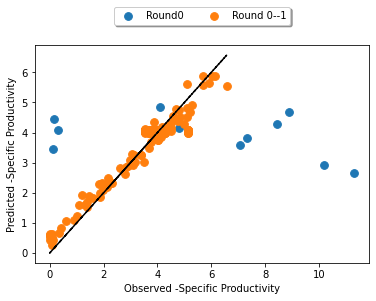

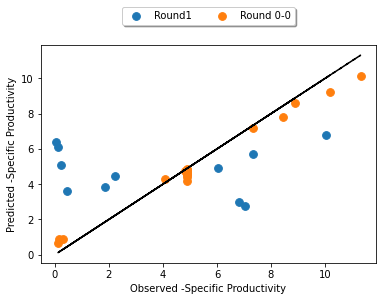

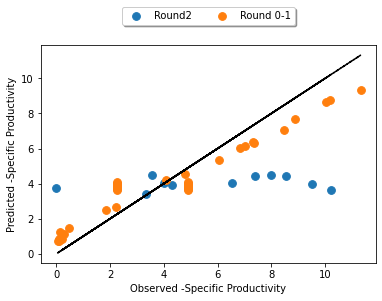

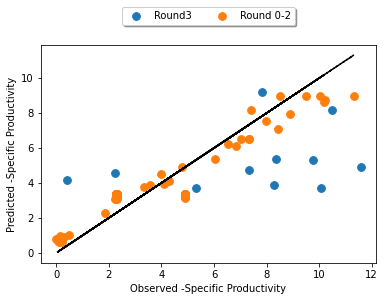

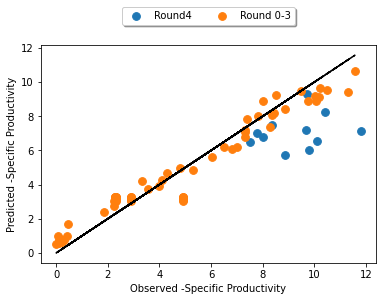

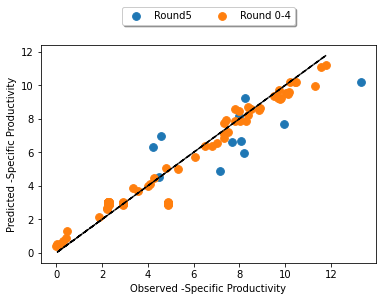

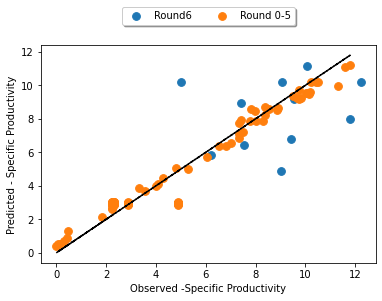

In [4]:
Train, Train_Std, Pred, Pred_Std, RMSEP, result_ts, Design, gp = data_prep(main_file_path, 
                                                               N_round_input, Rounds_bfr_check,
                                                               cut_off_round, property_name)

In [5]:
gp.kern.MixtureViaSumAndProduct.Mat52.lengthscale

index,GP_regression.sum.MixtureViaSumAndProduct.Mat52.lengthscale,constraints,priors
[0],0.41073480,+ve,
[1],9996.14259220,+ve,
[2],2.70944047,+ve,
[3],1.73705574,+ve,
[4],2.41957573,+ve,
[5],0.82368374,+ve,
[6],5062.63885882,+ve,
[7],5501.39405378,+ve,


In [6]:
gp

GP_regression.,value,constraints,priors
sum.MixtureViaSumAndProduct.mix,0.41810333275550715,+ve,
sum.MixtureViaSumAndProduct.Mat52.lengthscale,"(8,)",+ve,
sum.white.variance,0.1,+ve fixed,
Gaussian_noise.variance,5.562684646268137e-309,+ve,


{0: 4.595861412008955, 1: 3.8907579624948085, 2: 3.480388909025858, 3: 3.91062413449898, 4: 2.582759765359826, 5: 1.8902600993404457, 6: 2.627865413189081}


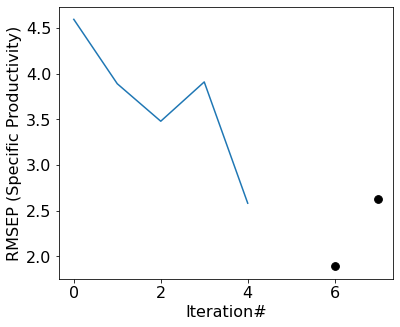

In [7]:
params = {'axes.titlesize': 20, 'xtick.labelsize': 16, 'ytick.labelsize': 16, 'axes.labelsize': 16}
hfont = {'fontname':'Arial'}
plt.rcParams.update(params)
plt.rcParams["figure.figsize"] = (6,5)
fig, axs = plt.subplots(1, 1, gridspec_kw={'hspace': 0.2, 'wspace': 0.2})

plotting_Data = []
for i in range(N_round_input):
    plotting_Data.append(RMSEP[i])

plt.plot(np.arange(0,cut_off_round), plotting_Data[0:cut_off_round])

for i in range(cut_off_round, N_round_input):
    plt.scatter(i+1, plotting_Data[i], s= 60, c = 'k')


plt.xlabel('Iteration#')
plt.ylabel('RMSEP (Specific Productivity)')

print(RMSEP)

In [8]:
Pred

{0: array([[3.44692092],
        [4.68800945],
        [4.08318405],
        [3.81846227],
        [2.64056942],
        [4.45570081],
        [4.14471789],
        [4.84563378],
        [4.28241225],
        [2.9079824 ],
        [3.59934821]]),
 1: array([[4.4587864 ],
        [4.90337596],
        [2.74736573],
        [5.10438668],
        [3.85553452],
        [3.64340934],
        [5.73746411],
        [3.01460701],
        [6.13679916],
        [6.41818161],
        [6.80474478]]),
 2: array([[4.46026681],
        [4.03580065],
        [4.45524305],
        [4.46693326],
        [4.05948187],
        [3.95796776],
        [3.77581249],
        [3.94846943],
        [4.49194825],
        [3.39833558],
        [3.61472693]]),
 3: array([[4.73220585],
        [3.74113774],
        [5.39356437],
        [3.8927466 ],
        [3.73787692],
        [4.55990801],
        [5.33742093],
        [4.91665884],
        [8.18505945],
        [9.17943538],
        [4.19818461]]),
 4: array([[

In [9]:
Pred_Std

{0: array([[1.05077705],
        [1.15828665],
        [1.20691382],
        [1.11290609],
        [0.73808367],
        [1.16609541],
        [1.12732552],
        [0.79239886],
        [0.80234464],
        [0.72999556],
        [0.71364772]]),
 1: array([[1.4862589 ],
        [1.38968462],
        [1.4887603 ],
        [1.42400968],
        [1.49525437],
        [1.39274569],
        [1.43963059],
        [1.36736627],
        [1.41917604],
        [1.42882408],
        [1.39139371]]),
 2: array([[1.69529514],
        [1.65256792],
        [1.66098557],
        [1.69454288],
        [1.66089028],
        [1.647145  ],
        [1.67771757],
        [1.640274  ],
        [1.64807037],
        [1.67245595],
        [1.70410405]]),
 3: array([[1.66763575],
        [0.98543571],
        [1.70293469],
        [1.49175547],
        [1.73062252],
        [1.67723069],
        [1.63202779],
        [1.69054165],
        [1.19254873],
        [0.87531232],
        [1.38833786]]),
 4: array([[

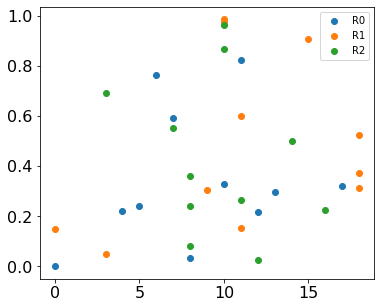

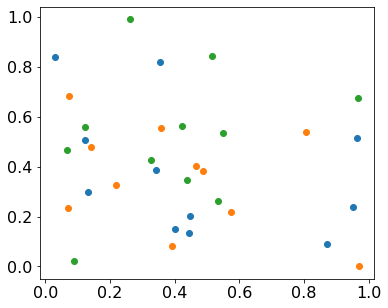

In [10]:
plt.figure()
for r in range(3):
    plt.scatter(Design[5][r].iloc[:,1], Design[5][r].iloc[:,2])


plt.legend(['R0', 'R1', 'R2'])

plt.figure()
for r in range(3):
    plt.scatter(Design[5][r].iloc[:,3], Design[5][r].iloc[:,4])

### Load current campaing Data and appropriate latest parameters

In [ ]:

#

In [ ]:
# result_tr,result_ts, Train, Train_Std, Pred, Pred_Std, RMSEP = data_prep(main_file_path, N_round_input, Rounds_bfr_check)
# for N_round in range(1, N_round_input + 1):
#     params = {'axes.titlesize': 20, 'xtick.labelsize': 16, 'ytick.labelsize': 16, 'axes.labelsize': 16}
#     hfont = {'fontname':'Arial'}

#     plt.rcParams.update(params)

#     plt.figure()
#     if N_round != N_round_input+1:
#         plt.scatter(result_ts[N_round][:-1], Pred[N_round], s = 60) #[:-1]
#         plt.scatter(result_tr[N_round], Train[N_round], s= 60)
#         plt.plot(result_tr[N_round], result_tr[N_round],'--k')
#         plt.xlabel('Observed - Specific Productivity')
#         plt.ylabel('Predicted - Specific Productivity')
#         plt.legend([ 'Round' + str(N_round), 'Round 0-'+str(N_round-1)], loc = 'upper center',bbox_to_anchor=(0.5, 1.2),
#                   ncol=3, fancybox=True, shadow=True)

#         plt.savefig('ObservedPredicted'+str(N_round)+'.png', dpi = 300,bbox_inches='tight')

In [ ]:
Pred[4]

In [ ]:
result_ts[4]

In [ ]:
Pred_Std[6]

In [ ]:
plotting_Data = []
for i in range(N_round_input):
    plotting_Data.append(RMSEP[i+1])
plt.plot(plotting_Data)

print(RMSEP)

In [ ]:
np.mean(result_pred_ts,2)

In [ ]:
Train_Std[5].max()

In [ ]:
for r in np.arange(1, 7):
    params = {'axes.titlesize': 20, 'xtick.labelsize': 16, 'ytick.labelsize': 16, 'axes.labelsize': 16}
    hfont = {'fontname':'Arial'}
    plt.rcParams.update(params)
    plt.rcParams["figure.figsize"] = (12,5)
    fig, axs = plt.subplots(1, 2, gridspec_kw={'hspace': 0.2, 'wspace': 0.2})
    axs[0].scatter(Design[r][r-1].iloc[:,1], Design[r][r-1].iloc[:,2])   
    axs[1].scatter(Design[r][r-1].iloc[:,3], Design[r][r-1].iloc[:,4])
    axs[0].set(xlim = [-1,20])

In [ ]:
Design[0].shape

In [ ]:
Design[1][0]